In [1]:
#rfm analysis

In [2]:
import pandas as pd

In [3]:
custdata=pd.read_csv('/home/kiran/Documents/pythonpracs/Sample - Superstore.csv')

In [4]:
custdata.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
custdata=custdata[['Customer ID','Product ID','Order ID','Order Date','Sales','Quantity']]

In [6]:
custdata['Order Date']=pd.to_datetime(custdata['Order Date'])

In [7]:
print('Transactions timeframe from {} to {}'.format(custdata['Order Date'].min(),
                                    custdata['Order Date'].max()))

Transactions timeframe from 2014-01-02 00:00:00 to 2017-12-30 00:00:00


In [8]:
custdata['Totalsum']=custdata['Sales']*custdata['Quantity']

In [9]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
# Create snapshot date
referencedata= custdata['Order Date']
print(referencedata)# Grouping by CustomerID


0      2016-08-11
1      2016-08-11
2      2016-12-06
3      2015-11-10
4      2015-11-10
5      2014-09-06
6      2014-09-06
7      2014-09-06
8      2014-09-06
9      2014-09-06
10     2014-09-06
11     2014-09-06
12     2017-04-15
13     2016-05-12
14     2015-11-22
15     2015-11-22
16     2014-11-11
17     2014-05-13
18     2014-08-27
19     2014-08-27
20     2014-08-27
21     2016-09-12
22     2016-09-12
23     2017-07-16
24     2015-09-25
25     2016-01-16
26     2016-01-16
27     2015-09-17
28     2015-09-17
29     2015-09-17
          ...    
9964   2016-05-12
9965   2016-05-12
9966   2016-05-12
9967   2017-11-12
9968   2017-11-12
9969   2017-11-12
9970   2015-06-28
9971   2015-06-28
9972   2016-11-09
9973   2016-06-12
9974   2016-06-12
9975   2016-06-12
9976   2016-06-12
9977   2016-06-12
9978   2016-06-12
9979   2016-06-12
9980   2015-06-09
9981   2017-03-08
9982   2016-09-22
9983   2016-09-22
9984   2015-05-17
9985   2015-05-17
9986   2016-09-29
9987   2017-11-17
9988   201

In [10]:
#Get the date when the last invoice was generated
referencedate=pd.to_datetime(referencedata.max()).date()

In [11]:
custdata['dayssincelastpurchase']=abs(pd.to_datetime(custdata['Order Date'])-pd.to_datetime(referencedate)).dt.days

In [12]:
custdata.columns

Index(['Customer ID', 'Product ID', 'Order ID', 'Order Date', 'Sales',
       'Quantity', 'Totalsum', 'dayssincelastpurchase'],
      dtype='object')

In [77]:
import numpy as np
Monetaryvalue=custdata.groupby(['Customer ID'])['Totalsum'].mean().reset_index()

In [78]:
Monetaryvalue

,Customer ID,Totalsum
0,AA-10315,1461.213091
1,AA-10375,182.322000
2,AA-10480,457.828000
3,AA-10645,1273.769722
4,AB-10015,330.746667
5,AB-10060,1966.143333
6,AB-10105,7192.885450
7,AB-10150,259.270167
8,AB-10165,258.965286
9,AB-10255,171.254571


In [79]:
import numpy as np
frequency=custdata.groupby(['Customer ID'])['Order ID'].count().reset_index()

In [80]:
frequency

,Customer ID,Order ID
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
5,AB-10060,18
6,AB-10105,20
7,AB-10150,12
8,AB-10165,14
9,AB-10255,14


In [81]:
import numpy as np
recency=custdata.groupby(['Customer ID'])['dayssincelastpurchase'].max().reset_index()

In [82]:
recency

,Customer ID,dayssincelastpurchase
0,AA-10315,1370
1,AA-10375,1349
2,AA-10480,1365
3,AA-10645,1448
4,AB-10015,1411
5,AB-10060,834
6,AB-10105,1106
7,AB-10150,1337
8,AB-10165,1140
9,AB-10255,1257


In [83]:
rfmdata=pd.concat([Monetaryvalue,frequency['Order ID'],recency['dayssincelastpurchase']],axis=1)

In [84]:
rfmdata.columns=['custid','monetaryvalue','frequency','recency']

In [85]:
rfmdata=rfmdata[]

In [86]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
features=rfmdata[['monetaryvalue','frequency','recency']]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

In [87]:
features.describe()

,monetaryvalue,frequency,recency
count,793.000000,793.000000,793.000000
mean,1141.162443,12.602774,1164.195460
std,1152.257467,6.242559,256.791525
min,5.224500,1.000000,68.000000
25%,461.540800,8.000000,1095.000000
50%,815.005556,12.000000,1223.000000
75%,1420.504250,16.000000,1345.000000
max,9783.318000,37.000000,1458.000000


In [96]:
rfmdata[rfmdata['recency']>0]

,custid,monetaryvalue,frequency,recency
0,AA-10315,1461.213091,11,1370
1,AA-10375,182.322000,15,1349
2,AA-10480,457.828000,12,1365
3,AA-10645,1273.769722,18,1448
4,AB-10015,330.746667,6,1411
5,AB-10060,1966.143333,18,834
6,AB-10105,7192.885450,20,1106
7,AB-10150,259.270167,12,1337
8,AB-10165,258.965286,14,1140
9,AB-10255,171.254571,14,1257


In [144]:
wss=[]

In [145]:
for i in range(1,14):
    kmeanModel = KMeans(n_clusters=i).fit(scaled_features)
    wss.append(kmeanModel.inertia_)

 

In [146]:
len(wss)

13

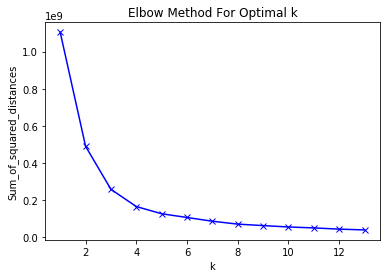

In [139]:
k=range(1,14)
import matplotlib.pyplot as plt
plt.plot(k,wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [149]:
rfmdata['segment']=KMeans(n_clusters=4).fit_predict(scaled_features)

In [150]:
rfmdata['segment']

0      3
1      3
2      3
3      0
4      3
5      2
6      1
7      3
8      3
9      3
10     3
11     3
12     3
13     2
14     3
15     3
16     2
17     3
18     3
19     3
20     2
21     3
22     0
23     3
24     2
25     3
26     0
27     3
28     0
29     0
      ..
763    3
764    1
765    3
766    3
767    3
768    3
769    3
770    3
771    2
772    2
773    1
774    3
775    2
776    0
777    3
778    3
779    3
780    3
781    3
782    2
783    3
784    3
785    3
786    0
787    0
788    0
789    1
790    1
791    0
792    3
Name: segment, Length: 793, dtype: int32